# Problem:2) Salary_hike -> Build a prediction model for Salary_hike

In [5]:
#Import the liabrary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
#import dataset
df1=pd.read_csv(r"C:\Users\admin\Documents\Data Science\Assignment\Simple Linear Regression\Salary_Data.csv")
df1

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [7]:
#Check for data type
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [8]:
# check for null value:
df1.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

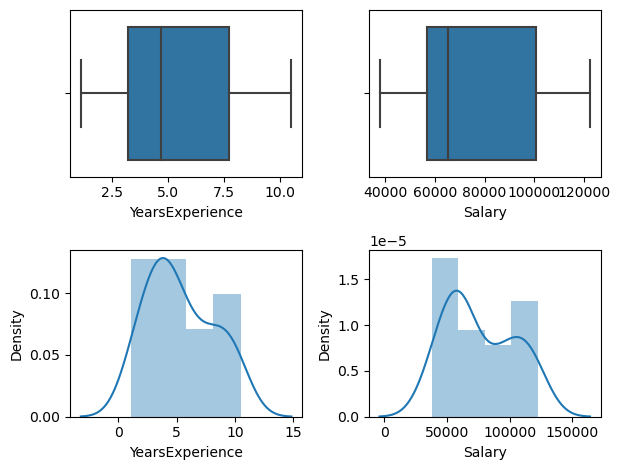

In [9]:
#check for outliers and check for distribution:
plt.subplot(2,2,1)
sns.boxplot(df1['YearsExperience'])

plt.subplot(2,2,2)
sns.boxplot(df1['Salary'])

plt.subplot(2,2,3)
sns.distplot(df1['YearsExperience'])

plt.subplot(2,2,4)
sns.distplot(df1['Salary'])
plt.tight_layout()

In [10]:
#Check for a correlation:
df1.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

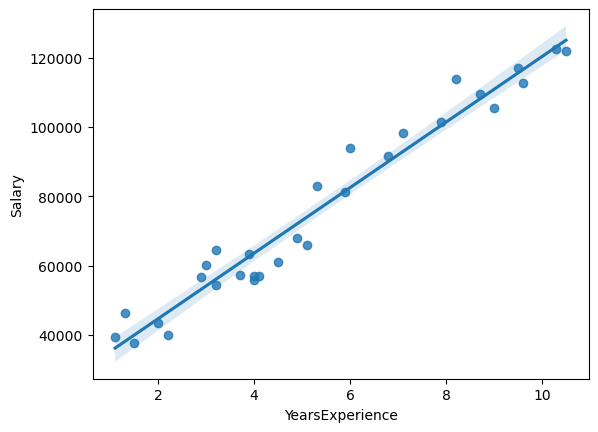

In [11]:
#Visualisation of correlation between variables:
sns.regplot(x=df1['YearsExperience'],y=df1['Salary'])

# Checking for Homoscedasticity or Hetroscedasticity

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

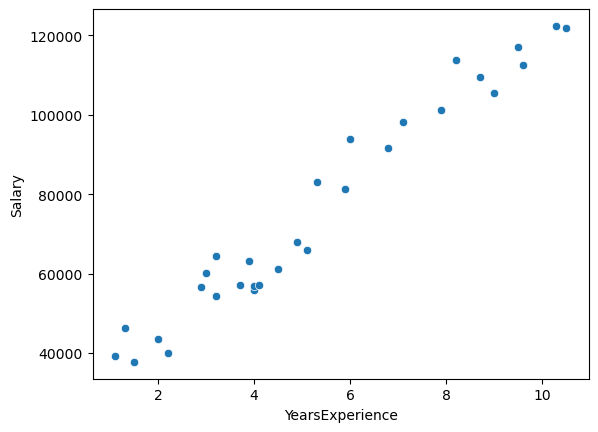

In [12]:
sns.scatterplot(x=df1['YearsExperience'], y=df1['Salary'])

It shows as the Salary Increases the Years of Experience increases variation is ocnstant along the way in data            
The data doesn't have any specific pattern in the variation. hence, we can say it's Homoscedasticity

In [15]:
import statsmodels.formula.api as smf

In [16]:
#create a model without transformation
model_1=smf.ols('Salary~YearsExperience', data=df1).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           1.14e-20
Time:                        23:39:06   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared and Adjusted R-squared scores are above 0.85.      
(It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction)      
Lets Try some data transformation to check whether these scores can get any better than this.

In [17]:
#create a model with sqrt tranformation
model_2=smf.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)', data=df1).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           7.58e-19
Time:                        23:40:00   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(YearsExperience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
#Cuberoot transformation on Data
model_3=smf.ols('np.cbrt(Salary)~np.cbrt(YearsExperience)', data=df1).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           6.37e-18
Time:                        23:40:10   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(YearsExperience)    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
#log transformation on Data
model_4=smf.ols('np.log(Salary)~np.log(YearsExperience)', data=df1).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           7.40e-16
Time:                        23:40:21   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Validation

In [20]:
#Calculate RMSE of model_1
model_1_rmse=np.sqrt(model_1.mse_resid)
model_1_rmse

5788.315051119395

In [21]:
#Calculate prediction with all transformed models:
model_2_pred_y=np.square(model_2.predict(df1['YearsExperience']))
model_3_pred_y=pow(model_3.predict(df1['YearsExperience']),3)
model_4_pred_y=np.exp(model_4.predict(df1['YearsExperience']))

In [22]:
from sklearn.metrics import mean_squared_error

In [24]:
#Calculate RMSE of all transformed models:
model_2_rmse=np.sqrt(mean_squared_error(df1['Salary'],model_2_pred_y))
model_3_rmse=np.sqrt(mean_squared_error(df1['Salary'],model_3_pred_y))
model_4_rmse=np.sqrt(mean_squared_error(df1['Salary'],model_4_pred_y))
print('model_1_rmse=',model_1_rmse,'\n','model_2_rmse=',model_2_rmse,'\n','model_3_rmse=',model_3_rmse,'\n','model_4_rmse=',model_4_rmse)

model_1_rmse= 5788.315051119395 
 model_2_rmse= 5960.647096174311 
 model_3_rmse= 6232.8154558358565 
 model_4_rmse= 7219.716974372802


In [25]:
#Check for best model:
data={'model_1_rmse':model_1_rmse,'model_2_rmse':model_2_rmse,'model_3_rmse':model_3_rmse,' model_4_rmse': model_4_rmse}
min(data, key=data.get)

'model_1_rmse'

# As model1 has the minimum RMSE and highest Adjusted R-squared score. Hence, we are going to use model2 to predict our values

In [29]:
#Predict the salary with model_1
pred_Salary=model_1.predict(df1['YearsExperience'])
pred_Salary

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [30]:
df1['pred_Salary']=pred_Salary
df1

,YearsExperience,Salary,pred_Salary
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788
